In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix, precision_recall_fscore_support, f1_score as sklearn_f1_score

In [3]:
df: pd.DataFrame = pd.read_csv("results/df_analysis.csv")
df.columns

Index(['Unnamed: 0', 'id', 'text', 'labels', 'label wiegand', 'label hurtlex',
       'label mol', 'label merged'],
      dtype='object')

In [4]:
df.head(5)

,Unnamed: 0,id,text,labels,label wiegand,label hurtlex,label mol,label merged
0,0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,1,True,True,True,True
1,1,27014,"#ConstitutionDay is revered by Conservatives, ...",0,True,True,True,True
2,2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,0,False,True,True,True
3,3,13876,#Watching #Boomer getting the news that she is...,0,False,False,False,False
4,4,60133,#NoPasaran: Unity demo to oppose the far-right...,1,False,True,True,True


In [5]:
def plot_confusion_matrix(lexicon: str, data: pd.DataFrame):
    confusion_matrix = np.array(data)
    class_labels = ['Not offensive', 'Offensive']
    predicted_labels = ['Not offensive', 'Offensive']

    sns.set(font_scale=1.2)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        confusion_matrix, annot=True, fmt="d", cmap="Blues",
        xticklabels=predicted_labels, yticklabels=class_labels, cbar=True
    )

    plt.title(f"Confusion Matrix {lexicon}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")

    plt.show()

Column: label wiegand

Confusion Matrix:

          Predicted 0  Predicted 1
Actual 0          485          135
Actual 1          107          133


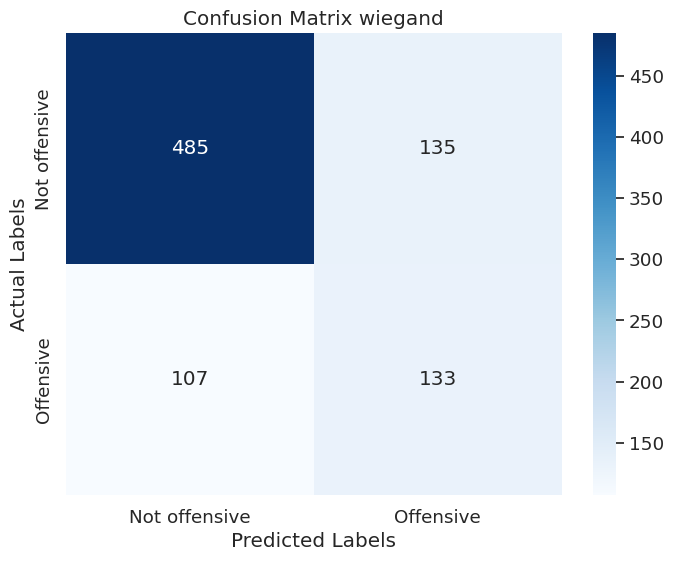



Precision, Recall, F1-Score per Category:
  Label  Precision    Recall  F1-Score
0     0   0.819257  0.782258  0.800330
1     1   0.496269  0.554167  0.523622


Macro-F1:
      Label  label wiegand
0  Macro-F1       0.661976
--------------------------------------------------------------------------------
Column: label hurtlex

Confusion Matrix:

          Predicted 0  Predicted 1
Actual 0          100          520
Actual 1           22          218


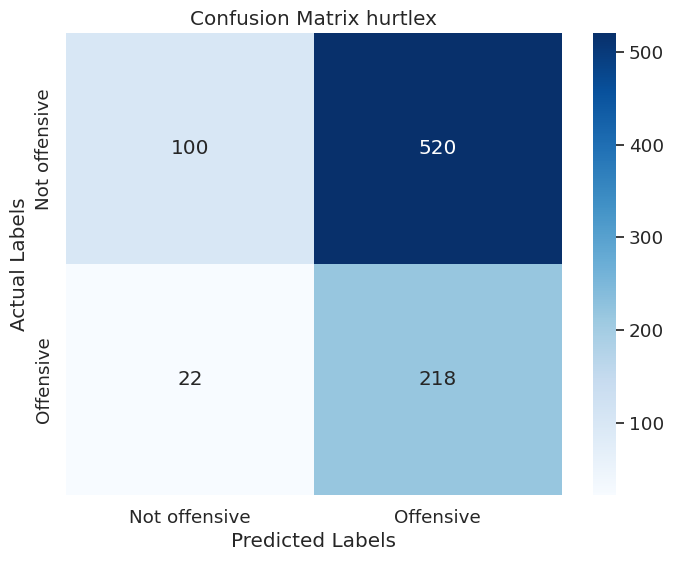



Precision, Recall, F1-Score per Category:
  Label  Precision    Recall  F1-Score
0     0   0.819672  0.161290  0.269542
1     1   0.295393  0.908333  0.445808


Macro-F1:
      Label  label hurtlex
0  Macro-F1       0.357675
--------------------------------------------------------------------------------
Column: label mol

Confusion Matrix:

          Predicted 0  Predicted 1
Actual 0          333          287
Actual 1           59          181


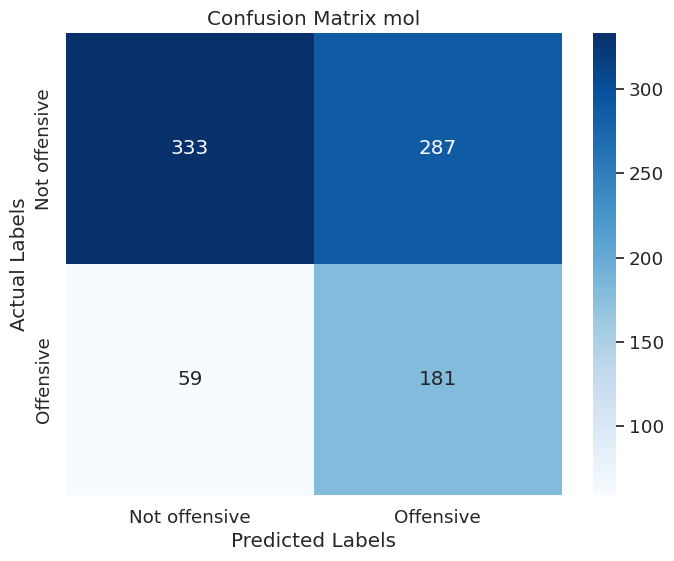



Precision, Recall, F1-Score per Category:
  Label  Precision    Recall  F1-Score
0     0   0.849490  0.537097  0.658103
1     1   0.386752  0.754167  0.511299


Macro-F1:
      Label  label mol
0  Macro-F1   0.584701
--------------------------------------------------------------------------------
Column: label merged

Confusion Matrix:

          Predicted 0  Predicted 1
Actual 0           90          530
Actual 1           18          222


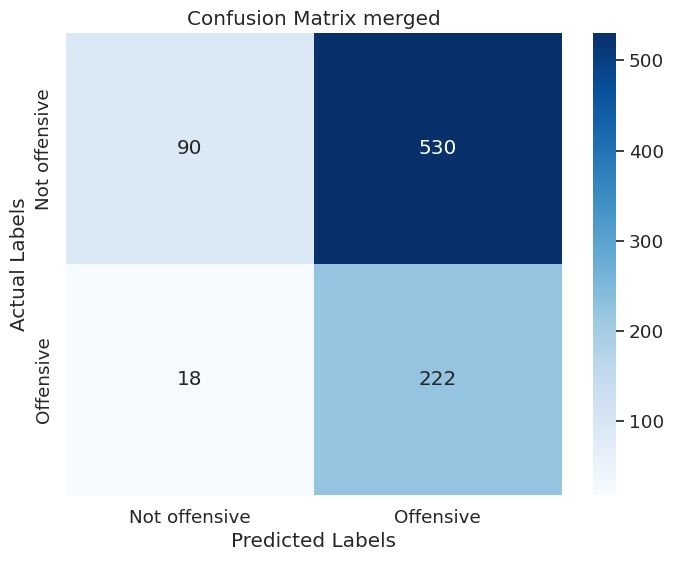



Precision, Recall, F1-Score per Category:
  Label  Precision    Recall  F1-Score
0     0   0.833333  0.145161  0.247253
1     1   0.295213  0.925000  0.447581


Macro-F1:
      Label  label merged
0  Macro-F1      0.347417
--------------------------------------------------------------------------------


In [10]:
true_labels = df['labels']

def calculate_metrics(true_labels, predicted_labels):
    confusion = sklearn_confusion_matrix(true_labels, predicted_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average=None, labels=[0, 1])
    macro_f1 = sklearn_f1_score(true_labels, predicted_labels, average='macro')
    return confusion, precision, recall, f1, macro_f1

for lexicon in ['wiegand', 'hurtlex', 'mol', 'merged']:
    column = f'label {lexicon}'
    predicted_labels = df[column].astype(int)  # Convert True/False to 1/0
    confusion_matrix, precision, recall, f1, macro_f1 = calculate_metrics(true_labels, predicted_labels)
    confusion_matrix_df = pd.DataFrame(confusion_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

    # Create DataFrames for precision, recall, F-measure per category, and macro-F1
    precision_recall_f1_df = pd.DataFrame({
        'Label': ['0', '1'],
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    macro_f1_df = pd.DataFrame({
        'Label': ['Macro-F1'],
        column: [macro_f1]
    })

    # Print the results for the current column
    print(f"Column: {column}\n")
    print("Confusion Matrix:\n")
    print(confusion_matrix_df)
    plot_confusion_matrix(lexicon, confusion_matrix_df)
    print("\n")
    print("Precision, Recall, F1-Score per Category:")
    print(precision_recall_f1_df)
    print("\n")
    print("Macro-F1:")
    print(macro_f1_df)
    print("-" * 80)
